<a href="https://colab.research.google.com/github/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/notebooks/Jun_Hoe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
from typing import Any, Union, Tuple

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from scipy.stats import chi2

import missingno as msno

from imblearn.over_sampling import SMOTE

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j/view?usp=sharing
!mkdir data/
!mv bmarket.db data/

Downloading...
From: https://drive.google.com/uc?id=17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j
To: /content/bmarket.db
100% 3.15M/3.15M [00:00<00:00, 36.7MB/s]


In [ ]:
con = sqlite3.connect("data/bmarket.db")
cursor = con.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
for row in cursor.fetchall():
    print(row)

('bank_marketing',)


In [ ]:
query = "SELECT * FROM bank_marketing;"
df = pd.read_sql_query(query, con)
df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


![IMAGE of attributes of bank marketing table](https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/EDA/images/bmarketing_attributes.png?raw=1)

## 1. Initiate Data Understanding and Insights

In [ ]:
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58 years,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37 years,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35 years,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40 years,management,married,university.degree,no,None,no,telephone,2,999,no


In [ ]:
df.info()
print("\nTable Size:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB

Table Size: (41188, 12)


In [ ]:
df.isna().sum()

,0
Client ID,0
Age,0
Occupation,0
Marital Status,0
Education Level,0
Credit Default,0
Housing Loan,24789
Personal Loan,4146
Contact Method,0
Campaign Calls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

/usr/local/lib/python3.12/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



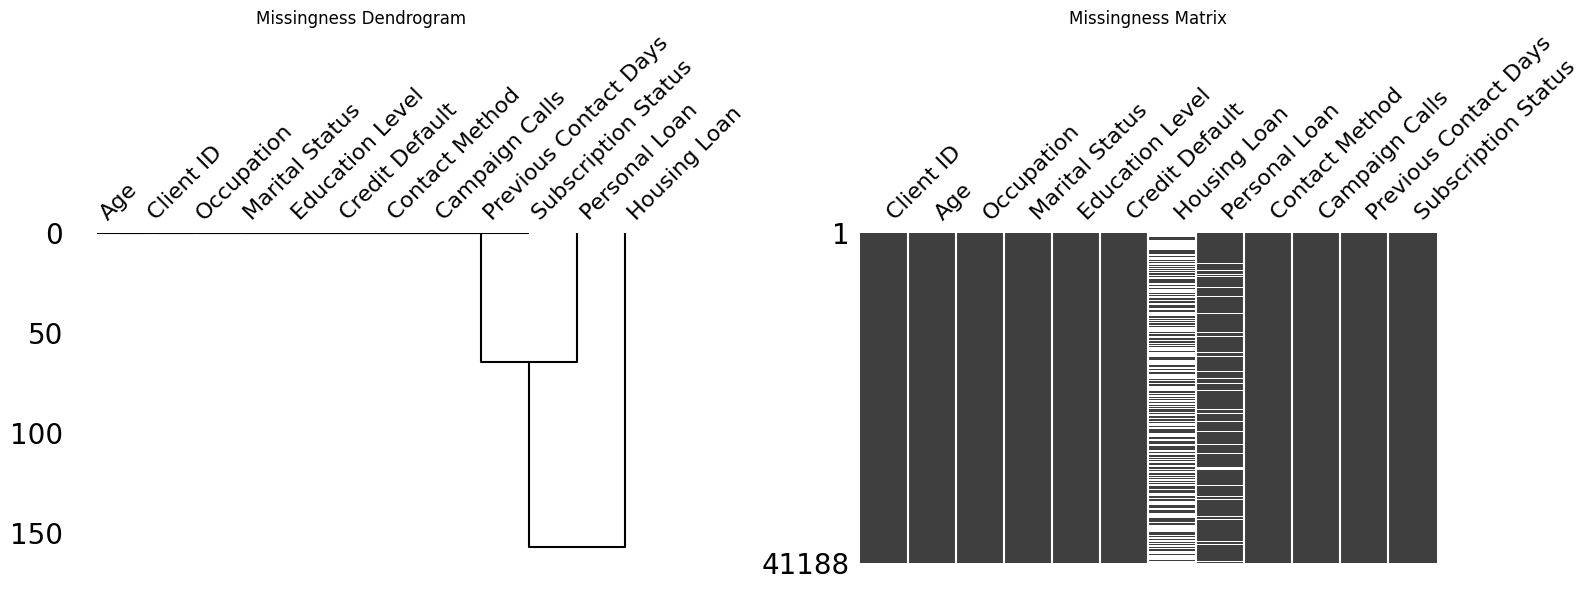

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

msno.dendrogram(df, ax=axes[0])
axes[0].set_title("Missingness Dendrogram")

msno.matrix(df, ax=axes[1])
axes[1].set_title("Missingness Matrix")

plt.tight_layout()
plt.show()

> **OBSERVATION:**
___

- Reading the bank marketing table, the dataframe has **41188 rows** and **12 columns**.

- While observing the .info(), we can see that **`Client ID`**, **`Campaign Call`** and **`Previous Contact Days`** is assigned as *Integer* type. While the remaining columns are *Object* type.

- Furthermore, the .info() also shows that all of the columns has no empty values besides **Housing Loan (24789 missing data)** and **Personal Loan (4146 missing data)**.

- There is **no duplicated data** found.

- In addition, it is understandable that the `Personal Loan` and `Housing Loan` has a relationship in terms of missing values as shown in the dendrogram. Yet, they have a very far match to predict each other. Telling me that their missing values are not on the same row most of the time (Most likely due to the extreme sheer amount of missing data in Housing Loan).

- The `Subscription Status` column shows values of *yes* or *no* in string type instead of *True* or *False* in boolean type.

- Lastly, the values in `Age` column seems to **contains the text *years*** after all the numeric values, which is unnecessary. While `Education Level` column has a **two part format with a '.' between two key words** (e.g. high.school, univeristy.degree). The `Occupation` column has an **admin role that ended with '.'**.



> **THOUGHT PROCESS:**
___

1. A deeper observation into `Education Level` and `Occupation` columns is required to get a better understanding before cleaning.

2. I can remove *years* from the values in `Age` column and change the data type to *Integer*.

3. I can convert `Subscription Status` column into boolean type, with values of *True* or *False*, since the attribute says the column is defines as "Whether the client subscribed or not".


4. May consider dropping `Housing Loan` column since the missingno dendrogram and matrix shows an extremely high missingness.

Possible Hypothesis
___
- The table displayed shows signs of **missing data** in certain columns (e.g. `Occupation`, `Education Level`, `Credit Default`). These columns **were expected to have no empty values** based on previous statement. These missing values are refered to as *unknown*.

- If so, I need to replace all the *unknown* with *numpy NaN (np.nan)* to ensure all the missing data is captured.

#### Side Possibility 1a. Replace *unknown* and *None* with np.nan)

In [ ]:
df_unknown_to_none = df.copy()
replace_with_nan = ["unknown", None]
df_unknown_to_none.replace(replace_with_nan, np.nan, inplace=True)
df_unknown_to_none.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             40858 non-null  object
 3   Marital Status         41108 non-null  object
 4   Education Level        39457 non-null  object
 5   Credit Default         32591 non-null  object
 6   Housing Loan           16006 non-null  object
 7   Personal Loan          36165 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [ ]:
df_unknown_to_none.isna().sum()

,0
Client ID,0
Age,0
Occupation,330
Marital Status,80
Education Level,1731
Credit Default,8597
Housing Loan,25182
Personal Loan,5023
Contact Method,0
Campaign Calls,0


In [ ]:
df_unknown_to_none.duplicated().sum()

np.int64(0)

/usr/local/lib/python3.12/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



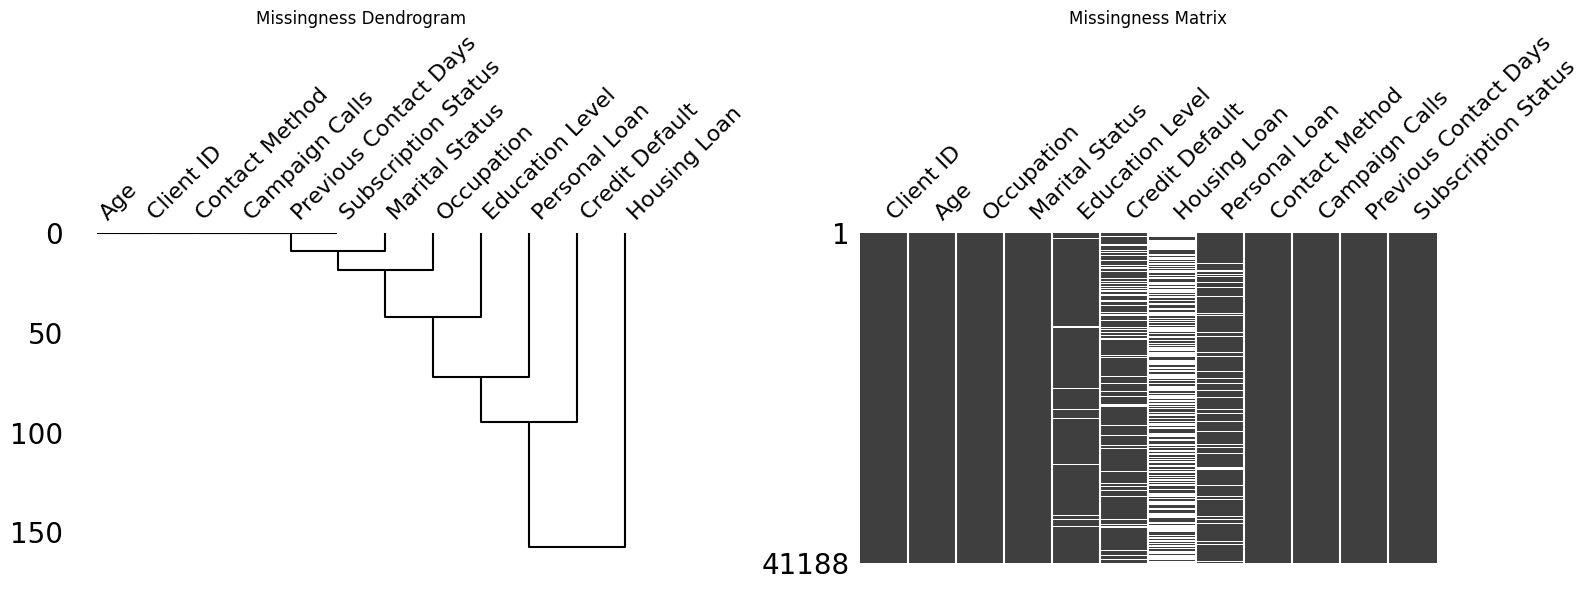

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

msno.dendrogram(df_unknown_to_none, ax=axes[0])
axes[0].set_title("Missingness Dendrogram")

msno.matrix(df_unknown_to_none, ax=axes[1])
axes[1].set_title("Missingness Matrix")

plt.tight_layout()
plt.show()

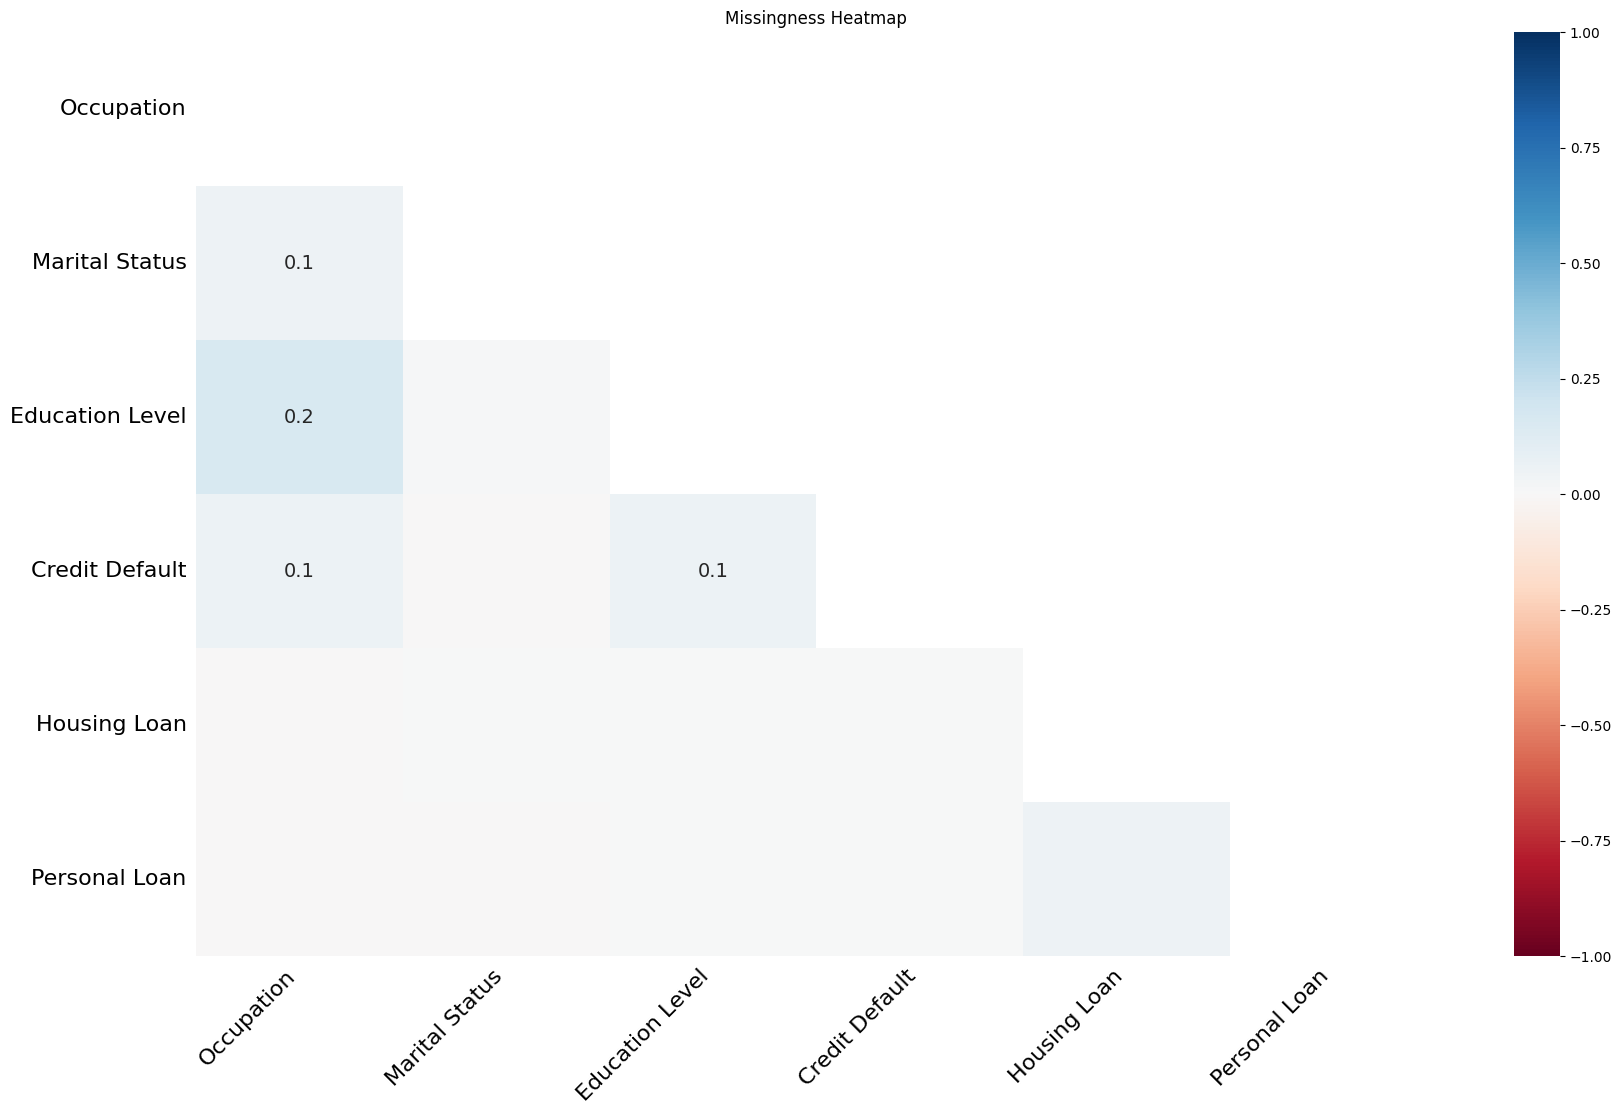

In [ ]:
msno.heatmap(df_unknown_to_none)
plt.title("Missingness Heatmap")
plt.show()

> **Observation:**
___
- In this scenario of treating unknown as None, we can see that Housing Loan still has the furthest gap with the rest of columns in the dendrogram.

- Although in dendrogram, it shows a close relationship in missing values between some of the columns, the heatmap disagrees as all of them have a very low correlation
  - The highest correlation is 0.2 between Education Level and Occupation.
  - 3 of the correlation is 0.1
  - While the remaining are extremely close to 0.

> **Thought Process:**
___
1. This shows that methods like joint imputation or model-based imputation (if necessary) would not be helpful since there is very little correlation of the occurrence of missing values.

2. For very low missing values columns, we can drop the rows or impute them.

3. The ones with low missing values, will require independent imputation with techniques like simple imputation or random distribution imputation will suffice

4. High missing values may result in dropping the entire column.

#### Graph Plot Functions

In [ ]:
def plot_bar_graph(df, col, y=None, kind="bar", stack=False, figsize=(8, 5), top=None, title=None, ascending=False, x_rotation=0, legend=True):
  """
  Plot a bar graph for the input data.

  Parameters
  ----------
  df    : DataFrame
  col   : name of column for x-axis
  y     : name of column for y-axis (only for 'bar')
  kind: 'bar' (Default) or 'count'
    bar:    plot bar graph
    count:  plot count graph
  """
  if kind == "count":
      if not stack:
        counts = df[col].value_counts(ascending=ascending).reset_index()
        total = counts['count'].sum()
        counts['label_text'] = counts.apply(lambda row: f"{row['count']} ({row['count']/total*100:.1f}%)", axis=1)

        plot_df = counts if top is None else counts.head(top)

        fig = px.bar(
            plot_df,
            x=col,
            y='count',
            text='label_text',
            color=col
        )
      else:
        stack_df = df.groupby([col, "Subscription Status"]).size().reset_index(name="count")
        order = (df["Subscription Status"].value_counts(ascending=True).index.tolist())

        if top is not None:
          top_vals = df[col].value_counts().head(top).index
          stack_df = stack_df[stack_df[col].isin(top_vals)]

        fig = px.bar(
            stack_df,
            x=col,
            y="count",
            color="Subscription Status",
            text="count",
            category_orders={"Subscription Status": order}
        )
        fig.update_layout(barmode="stack")

  elif kind == "bar":
      if y is None:
          raise ValueError("y must be provided for barplot")
      plot_df = df if top is None else df.head(top)

      fig = px.bar(
          plot_df,
          x=col,
          y=y,
          text=y,
          color=col
      )

  else:
      raise ValueError("kind must be 'bar' or 'count'")

  fig.update_traces(textposition='outside')
  fig.update_layout(
      title=title if title else f"{kind.capitalize()} plot of {col}",
      xaxis_title=col,
      yaxis_title=y if kind == "bar" else "Frequency",
      xaxis_tickangle=x_rotation,
      showlegend=legend,
      width=figsize[0]*100,
      height=figsize[1]*100
  )
  fig.show()

def plot_hist_graph(df, col, bins=None, bargap=0, dtick=10, figsize=(8, 5), top=None, title=None, x_rotation=0):
  """
  Plot a histogram graph for the input data.

  Parameters
  ----------
  df    : DataFrame
  col   : name of column for x-axis
  bins  : number of bins for the historgram
  bargap: gap between histogram bars
  """
  fig = px.histogram(
        df,
        x=col,
        nbins=bins,
        text_auto=False
    )

  fig.update_layout(
      title=title if title else f"Histogram of {col}",
      xaxis_title=col,
      yaxis_title="Frequency",
      xaxis_tickangle=x_rotation,
      showlegend=False,
      width=figsize[0]*100,
      height=figsize[1]*100,
      bargap=bargap
  )
  fig.update_xaxes(
      tickmode='linear',
      dtick=dtick,
      showgrid=True
  )

  fig.show()

def plot_box_graph(df, col, figsize=(8, 5), title=None, y_rotation=0):
  """
  Plot a histogram graph for the input data.

  Parameters
  ----------
  df    : DataFrame
  col   : name of column for x-axis
  """
  fig = px.box(
        df,
        x=col,
    )

  fig.update_layout(
          title=title if title else f"Box Plot of {col}",
          yaxis_title=col,
          showlegend=False,
          width=figsize[0]*100,
          height=figsize[1]*100
    )

  fig.show()

#### 1b. Understanding Column data by Columns and insights

##### `Client ID` Column

In [ ]:
print("Number of unique values:", df["Client ID"].nunique())

Number of unique values: 41188


> **OBSERVATION:**
___

- All rows/entries are uniquely identified by the Client ID.
- No repeated Client ID throughout data.

> **THINKING PROCESS:**
___

1. `Client ID` column can be remove as it serves no predicting values and contribute to high dimensionality issue in input data.

##### `Age` Column

In [ ]:
display(df["Age"].describe())
print("List all unique values:\n", df["Age"].sort_values().unique())

,Age
count,41188
unique,77
top,150 years
freq,4197


List all unique values:
 ['150 years' '17 years' '18 years' '19 years' '20 years' '21 years'
 '22 years' '23 years' '24 years' '25 years' '26 years' '27 years'
 '28 years' '29 years' '30 years' '31 years' '32 years' '33 years'
 '34 years' '35 years' '36 years' '37 years' '38 years' '39 years'
 '40 years' '41 years' '42 years' '43 years' '44 years' '45 years'
 '46 years' '47 years' '48 years' '49 years' '50 years' '51 years'
 '52 years' '53 years' '54 years' '55 years' '56 years' '57 years'
 '58 years' '59 years' '60 years' '61 years' '62 years' '63 years'
 '64 years' '65 years' '66 years' '67 years' '68 years' '69 years'
 '70 years' '71 years' '72 years' '73 years' '74 years' '75 years'
 '76 years' '77 years' '78 years' '79 years' '80 years' '81 years'
 '82 years' '83 years' '84 years' '85 years' '86 years' '88 years'
 '89 years' '91 years' '92 years' '95 years' '98 years']


In [ ]:
plot_bar_graph(df, col="Age", y="Frequency", kind="count", title="Age Distribution", top=10, x_rotation=-55, legend=False)

In [ ]:
print(
    "Percentage of 150 years old: {:.5f}%".format(
        df[df["Age"] == "150 years"].shape[0] / df.shape[0] * 100
    )
)

Percentage of 150 years old: 10.18986%


> **OBSERVATION:**
___

- "150 years" !!! Most likely a recorded error.
- The value "150 years" has the highest frequency by a large margin compared to other ages.
- The values in `Age` column do **contains the text *years*** after all the numeric values, which is a data type issue.

> **THINKING PROCESS**
___

- I can remove *years* from the values in `Age` column.
- Convert the data type to *Integer*.
- Plot histogram to get better insights.
- Possibly impute the "150 years" with simple imputation (mean or median)

##### `Occupation` Column

In [ ]:
display(df["Occupation"].describe())
print("List all unique values:\n", df["Occupation"].sort_values().unique())

,Occupation
count,41188
unique,12
top,admin.
freq,10422


List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [ ]:
plot_bar_graph(df, col="Occupation", y="Frequency", kind="count", title="Occupation Distribution", x_rotation=-55, legend=True)

In [ ]:
print(
    "Percentage of unknown: {:.2f}%".format(
        df[df["Occupation"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown: 0.80%


> **Observation:**
___

- It is a Nominal Category
- Possible to one-hot or integer encode to feed into machine learning
- unknown only made out of 0.8% of the column.

> **THINKING PROCESS**
___

- unknown is only 0.8%, which can afford to remove the row with the unknown in this column.


##### `Marital Status` Column

In [ ]:
display(df["Marital Status"].describe())
print("List all unique values:\n", df["Marital Status"].sort_values().unique())

,Marital Status
count,41188
unique,4
top,married
freq,24928


List all unique values:
 ['divorced' 'married' 'single' 'unknown']


In [ ]:
plot_bar_graph(df, col="Marital Status", y="Frequency", kind="count", title="Marital Status Distribution", x_rotation=-55, legend=True)

In [ ]:
print(
    "Percentage of unknown: {:.2f}%".format(
        df[df["Marital Status"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown: 0.19%


> **Observation:**
___

- This is a Nominal Category
- Most client are Married, second most are Singles
- The third are Divorced
- unknown only made out of 0.17% of the column.

> **THINKING PROCESS**
___

- unknown is only 0.17%, which can afford to remove the row with the unknown in this column.

##### `Education Level` Column

In [ ]:
display(df["Education Level"].describe())
print("List all unique values:\n", df["Education Level"].sort_values().unique())

,Education Level
count,41188
unique,8
top,university.degree
freq,12168


List all unique values:
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


In [ ]:
plot_bar_graph(df, col="Education Level", y="Frequency", kind="count", title="Education Level Distribution", x_rotation=-55, legend=True)

In [ ]:
print("Percentage of unknown: {:.2f}%".format(df[df["Education Level"] == "unknown"].shape[0] / df.shape[0] * 100))

Percentage of unknown: 4.20%


> **Observation:**
___

- This is a Nominal Category
- Top are university, second highest is high school.
- Third is clients with 9 years of basic studies.
- unknown is made out of 3.91% in the column.

> **THINKING PROCESS**
___

- unknown is 3.91%, which cannot be drop since it can lose a meaning.
- Should be treated as a category since it may provide informative insights.

##### `Credit Default` Column

In [ ]:
display(df["Credit Default"].describe())
print("List all unique values:\n", df["Credit Default"].sort_values().unique())

,Credit Default
count,41188
unique,3
top,no
freq,32588


List all unique values:
 ['no' 'unknown' 'yes']


In [ ]:
plot_bar_graph(df, col="Credit Default", y="Frequency", kind="count", title="Credit Default Distribution", x_rotation=-55, legend=True)

In [ ]:
print("Percentage of yes: {:.5f}%".format(df[df["Credit Default"] == "yes"].shape[0] / df.shape[0] * 100))
print("Percentage of unknown: {:.5f}%".format(df[df["Credit Default"] == "unknown"].shape[0] / df.shape[0] * 100))
print("Percentage of no: {:.5f}%".format(df[df["Credit Default"] == "no"].shape[0] / df.shape[0] * 100))

Percentage of yes: 0.00728%
Percentage of unknown: 20.87258%
Percentage of no: 79.12013%


> **Observation:**
___

- The amount of "yes" is way too little and most are "no" (80%).
- 20% is unknown, which shows no information.

> **THOUGHT PROCESS:**
___

- Can drop `Credit Default` column since majority disagree with credit default and only 0.007% agrees to it.
- Meaning it is severely imbalanced, where the column is unclassifiable.
- Especially, unknown made out of 20% which is uninformative.

##### `Housing Loan` Column

In [ ]:
display(df["Housing Loan"].describe())
print("List all unique values:\n", df["Housing Loan"].sort_values().unique())

,Housing Loan
count,16399
unique,3
top,yes
freq,8595


List all unique values:
 ['no' 'unknown' 'yes' None]


In [ ]:
plot_bar_graph(df, col="Housing Loan", y="Frequency", kind="count", title="Housing Loan Distribution", x_rotation=-55, legend=True)

In [ ]:
print(
    "Percentage of unknown (**include None in total frequency**): {:.5f}%".format(
        df[df["Housing Loan"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)
print(
    "Percentage of None: {:.5f}%".format(
        df[df["Housing Loan"].isna()].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown (**include None in total frequency**): 0.95416%
Percentage of None: 60.18501%


> **Observation:**
___

- There is a very high percentage of missing values (60%) in the column.
- Excluding rows with None in Housing Loan column:
  - The number of "Yes" is the highest with 52.4% and "No" is second highest with 45.2%.
  - There is 2.4% of unknown which is the lowest.

> **THOUGHT PROCESS:**
___

- 60% is an extremely large gap for missing values.
- There is two method come to mind:
  - Drop the entire column
  - Attempt to impute it with possibly model-based imputation. Since Housing Loan may provide good insights and patterns to predict Subscription Status.

##### `Personal Loan` Column

In [ ]:
display(df["Personal Loan"].describe())
print("List all unique values:\n", df["Personal Loan"].sort_values().unique())

,Personal Loan
count,37042
unique,3
top,no
freq,30532


List all unique values:
 ['no' 'unknown' 'yes' None]


In [ ]:
plot_bar_graph(df, col="Personal Loan", y="Frequency", kind="count", title="Personal Loan Distribution", x_rotation=-55, legend=True)

In [ ]:
print("Percentage of unknown (**include None in total frequency**): {:.5f}%".format(df[df["Personal Loan"] == "unknown"].shape[0] / df.shape[0] * 100))
print("Percentage of None: {:.5f}%".format(df[df["Personal Loan"].isna()].shape[0]/df.shape[0]*100))
print("Number of rows of None: {}".format(df[df["Personal Loan"].isna()].shape[0]))

Percentage of unknown (**include None in total frequency**): 2.12926%
Percentage of None: 10.06604%
Number of rows of None: 4146


> **Observation:**
___

- There is a relatively low percentage of missing values (10%) in the column.
- Excluding rows with None in Personal Loan column
  - The number of "No" is the highest with 82.4% and "Yes" is second highest with 15.2%.
  - There is 2.4% of unknown which is the lowest.

> **THOUGHT PROCESS:**
___

- Although missing values make up of only 10%, dropping them may not be ideal as it represents quite a significant number of rows.
- Imputation could be a better approach to retain as much data as possible while handling missing entries.

##### `Contact Method` Column

In [ ]:
display(df["Contact Method"].describe())
print("List all unique values:\n", df["Contact Method"].sort_values().unique())

,Contact Method
count,41188
unique,4
top,Cell
freq,13100


List all unique values:
 ['Cell' 'Telephone' 'cellular' 'telephone']


In [ ]:
plot_bar_graph(df, col="Contact Method", y="Frequency", kind="count", title="Contact Method Distribution", x_rotation=-55, legend=True)

> **Observation:**
___

- Repeated and inconsistent formats:
  - Cell and cellular
  - Telephone and telephone
- This is a Nominal category

> **THOUGHT PROCESS:**
___

- Replace all Cell with cellular
- Replace all Telephone with telephone

##### `Campaign Calls` Column

In [ ]:
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,41188.000000
mean,2.051374
std,3.171345
min,-41.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [-41 -35 -32 -29 -28 -25 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  37  39  40  42  43  56]


In [ ]:
# Freedman–Diaconis rule
q75, q25 = np.percentile(df['Campaign Calls'], [75, 25])
bin_width = 2 * (q75 - q25) * len(df)**(-1/3)
bins = int((df['Campaign Calls'].max() - df['Campaign Calls'].min()) / bin_width)

plot_hist_graph(df, col="Campaign Calls", bins=bins, x_rotation=0)

> **Observation:**
___

- There is negative values in the column.
- There is a good and symmetric distribution from range -41 to 56, with a single peak at 1 calls.
- There is **No** 0 calls.

> **THOUGHT PROCESS:**
___

- Highly doubt that the negative values are valid:
  - The definition given is "*Total number* of contacts performed for this campaign and this client, including the last contact".
  - The calls are very evenly distributed, meaning that it is mirrored.
- Possible solution:
  1. Absolute the negative to turn to positive.
  2. Add another column to retain the negative meaning, together with Solution #1.


##### `Previous Contact Days` Column

In [ ]:
display(df[df["Previous Contact Days"] != 999]["Previous Contact Days"].describe())
print("List all unique values:\n", df["Previous Contact Days"].sort_values().unique())

,Previous Contact Days
count,1515.000000
mean,6.014521
std,3.824906
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,27.000000


List all unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]


In [ ]:
plot_hist_graph(df[df["Previous Contact Days"] != 999], col="Previous Contact Days", bins=30, bargap=0.1, dtick=1, x_rotation=0)

In [ ]:
plot_box_graph(df[df["Previous Contact Days"] != 999], col="Previous Contact Days")

In [ ]:
print(
    "Percentage of 999: {:.5f}%".format(
        df[df["Previous Contact Days"] == 999].shape[0] / df.shape[0] * 100
    )
)

Percentage of 999: 96.32174%


> **Observation:**
___

- There has the highest number of occurences with 96%.
- 999 is way too big of a value to be plotted as well as for machine learning. Cannot be included into the histogram and box plot.
- Excluding 999:


> **THOUGHT PROCESS:**
___

- Replace 999 to -1 in order to maintain the no prior contact meaning.
- Add a boolean column for "got prior contact" or "no prior contact", as a feature, for AI model to understand meaning of -1 value. This prevents models, especially regression models, to treat -1 as a numeric value instead of category.


##### `Subscription Status` Column

In [ ]:
display(df["Subscription Status"].describe())
print("List all unique values:\n", df["Subscription Status"].sort_values().unique())

,Subscription Status
count,41188
unique,2
top,no
freq,36548


List all unique values:
 ['no' 'yes']


In [ ]:
plot_bar_graph(df, col="Subscription Status", y="Frequency", kind="count", title="Subscription Status Distribution", x_rotation=-55, legend=True)

> **Observation:**
___

- The column is very imbalance.

> **THOUGHT PROCESS:**
___

- Convert to Boolean data type
- Use Stratify when splitting the dataset for model training to ensure balance yes and no

## Data Preparation

#### Data Cleaning

##### Data Cleaning on `Client ID` Column

In [ ]:
df.drop("Client ID", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


##### Data Cleaning on `Age` Column

In [ ]:
df["Age"] = df["Age"].map(lambda x: x.split()[0])
df["Age"] = df["Age"].astype(int)
df["Age"]

,Age
0,57
1,55
2,33
3,36
4,27
...,...
41183,58
41184,37
41185,35
41186,40


In [ ]:
plot_hist_graph(df, col="Age", bins=30, bargap=0.1, dtick=5, x_rotation=-55)

In [ ]:
plot_hist_graph(df[df["Age"]!=150], col="Age", bins=30, bargap=0.1, dtick=5, x_rotation=-55)

> **Observation:**
___

-


> **THOUGHT PROCESS:**
___

-

##### Data Cleaning on `Occupation` Column

In [ ]:
df.drop(df[df["Occupation"] == "unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Occupation"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
New Shape:  (40858, 11)


##### Data Cleaning on `Marital Status` Column

In [ ]:
df.drop(df[df["Marital Status"] == "unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Marital Status"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['divorced' 'married' 'single']
New Shape:  (40787, 11)


##### Data Cleaning on `Credit Default` Column

In [ ]:
df.drop("Credit Default", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57,technician,married,high.school,no,yes,Cell,1,999,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,999,no
3,36,admin.,married,high.school,no,no,Telephone,4,999,no
4,27,housemaid,married,high.school,None,no,Cell,2,999,no
5,58,retired,married,professional.course,None,yes,Cell,1,999,no


##### Data Cleaning on `Contact Method` Column

In [ ]:
df["Contact Method"].replace({"Cell":"cellular", "Telephone":"telephone"}, inplace=True)

/tmp/ipython-input-272732235.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
plot_bar_graph(df, col="Contact Method", y="Frequency", kind='count', title="New Contact Method Distribution", top=10, x_rotation=-55, legend=True)

##### Data Cleaning on `Campaign Calls` Column

In [ ]:
df["Campaign Calls"] = df["Campaign Calls"].apply(lambda x: abs(x))
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,40787.000000
mean,2.566112
std,2.768103
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]


In [ ]:
plot_hist_graph(df, col="Campaign Calls", bins=30, bargap=0.1, dtick=5, x_rotation=-55)

##### Data Cleaning on `Previously Contacted` Column

In [ ]:
df["Previously Contacted"] = df["Previous Contact Days"] != 999 # Replace no prior (999) with False
df.replace({"Previous Contact Days": 999}, -1, inplace=True) # Replace no prior (999) with -1
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status,Previously Contacted
0,57,technician,married,high.school,no,yes,cellular,1,-1,no,False
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,no,False
3,36,admin.,married,high.school,no,no,telephone,4,-1,no,False
4,27,housemaid,married,high.school,None,no,cellular,2,-1,no,False
5,58,retired,married,professional.course,None,yes,cellular,1,-1,no,False


In [ ]:
plot_bar_graph(df, col="Previously Contacted", stack=True, kind='count', x_rotation=-55)

In [ ]:
plot_hist_graph(df[df['Previous Contact Days']!=-1], col='Previous Contact Days', bins=30, bargap=0.1, dtick=5, x_rotation=-55)

In [ ]:
columns = df.columns.tolist()
columns.remove("Subscription Status")
columns.append("Subscription Status")
df = df.reindex(columns=columns)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,no,yes,cellular,1,-1,False,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,False,no
3,36,admin.,married,high.school,no,no,telephone,4,-1,False,no
4,27,housemaid,married,high.school,None,no,cellular,2,-1,False,no
5,58,retired,married,professional.course,None,yes,cellular,1,-1,False,no


`Previously Contacted`: False means no prior contact (999) | True means there is contact

`Previous Contact Days`: 999 converted to -1

##### Data Cleaning on `Subscription Status` Column

In [ ]:
df["Subscription Status"].replace({"yes": 1, "no": 0}, inplace=True)
df["Subscription Status"] = df["Subscription Status"].astype(bool)
df.dtypes

/tmp/ipython-input-2640370511.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2640370511.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,0
Age,int64
Occupation,object
Marital Status,object
Education Level,object
Housing Loan,object
Personal Loan,object
Contact Method,object
Campaign Calls,int64
Previous Contact Days,int64
Previously Contacted,bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Housing Loan           16243 non-null  object
 5   Personal Loan          36679 non-null  object
 6   Contact Method         40787 non-null  object
 7   Campaign Calls         40787 non-null  int64 
 8   Previous Contact Days  40787 non-null  int64 
 9   Previously Contacted   40787 non-null  bool  
 10  Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 3.2+ MB


#### Simple Data Imputation Analysis

##### Simple Imputation on `Age` Column

In [ ]:
df_mean_rp = df.copy()
df_not_150 = df[df["Age"] != 150]["Age"]
df_mean_rp["Age_mean"] = df["Age"].apply(lambda x: df_not_150.agg("mean") if x == 150 else x)
df_mean_rp["Age_mean"].head()

,Age_mean
0,57.0
2,33.0
3,36.0
4,27.0
5,58.0


In [ ]:
df_not_150.agg("mean")

np.float64(39.97881517881518)

In [ ]:
plot_hist_graph(df_mean_rp, col='Age_mean', bins=30, bargap=0.1, dtick=5, x_rotation=-55)

In [ ]:
df_median_rp = df.copy()
df_not_150 = df[df["Age"] != 150]["Age"]
df_median_rp["Age_median"] = df["Age"].apply(lambda x: df_not_150.agg("median") if x == 150 else x)
df_median_rp["Age_median"].head()

,Age_median
0,57.0
2,33.0
3,36.0
4,27.0
5,58.0


In [ ]:
df_not_150.agg("median")

38.0

In [ ]:
plot_hist_graph(df_median_rp, col='Age_median', bins=30, bargap=0.1, dtick=5, x_rotation=-55)

> **Observation:**
___

- Both mean and median imputation were able to derive to the same distribution since both are approximately 38 to 39 years old.

- This shifted the distribution slightly to the center, distorting its original shape.

> **THOUGHT PROCESS:**
___

1. In order to maintain the original shape of distribution, I decided that mean and median may not be the best so I may utilize random distribution imputation instead.

#### Check relationships

In [ ]:
def ohe_encode(df: pd.DataFrame) -> pd.DataFrame:
  """
  One hot encode all object type columns in input DataFrame

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  encoder = OneHotEncoder(sparse_output=False)
  df_copy = df.copy()
  df_encode = pd.DataFrame(index=df_copy.index)

  for col in df_copy.columns:
    if df_copy[col].dtype == "object":
      encoded = encoder.fit_transform(df_copy[[col]])
      value_col = encoder.get_feature_names_out([col]) #Get ohe column value names
      encoded_columns = pd.DataFrame(encoded, columns=value_col, index=df_copy.index)
      df_encode = pd.concat([df_encode, encoded_columns], axis=1)
    else:
      df_encode[col] = df_copy[col]
  return df_encode

In [ ]:
def encoder_fn(df):
    encoder = LabelEncoder()
    df_copy = df.copy()
    df_encode = pd.DataFrame(index=df_copy.index)
    for col in df_copy.columns:
        if df_copy[col].dtype == "object":
            df_encode[col] = encoder.fit_transform(df_copy[col])
        else:
            df_encode[col] = df_copy[col]
    return df_encode

##### Mutual Information (MI) of Housing Loan

In [ ]:
df_encode = encoder_fn(df)
df_encode.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,9,1,3,0,2,0,1,-1,False,False
2,33,1,1,2,0,0,0,1,-1,False,False
3,36,0,1,3,0,0,1,4,-1,False,False
4,27,3,1,3,3,0,0,2,-1,False,False
5,58,5,1,5,3,2,0,1,-1,False,False


In [ ]:
df_encode["Housing Loan"].value_counts()

,count
Housing Loan,
3,24544
2,8522
0,7331
1,390


In [ ]:
target = "Housing Loan"
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  bool 
 9   Subscription Status    40787 non-null  bool 
dtypes: bool(2), int64(8)
memory usage: 2.9 MB
None
<class 'pandas.core.series.Series'>
Index: 40787 entries, 0 to 41187
Series name: Housing Loan
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 637.3 KB
None


In [ ]:
discrete_mask=[False, True, True, True, True, True, False, False, True, True]

mi_scores = mutual_info_classif(X_df, y, random_state=42, discrete_features=discrete_mask)

In [ ]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi = mi.rename(target).sort_values(ascending=False).round(4).reset_index()
mi

,index,Housing Loan
0,Personal Loan,0.0403
1,Previous Contact Days,0.0029
2,Campaign Calls,0.0020
3,Contact Method,0.0009
4,Age,0.0005
5,Occupation,0.0004
6,Education Level,0.0002
7,Marital Status,0.0001
8,Subscription Status,0.0001
9,Previously Contacted,0.0000


In [ ]:
plot_bar_graph(mi, col='index', y='Housing Loan', kind='bar', title="Mutual Information with Housing Loan", x_rotation=45)

> **Observation:**
___

- As shown in the mutual information plotted in bar chart, all the values are very low.
- The highest correlation is only 0.04 between Housing Loan and Personal Loan.
- While the remaining are less than 0.01

> **THOUGHT PROCESS:**
___

The reason for the mutual information is to check whether the team has a chance of performing model-based imputation.

1. Although the correlation with Personal Loan is the highest by a large margin compared to the others, it is still not viable since Personal Loan also have quite high number of missing values.

2. The remaining are all less than 0.01 which shows a very little correlation, meaning it is not possible model-based imputation.

3. MI can also use to tell the feature importances, with same logic, the lower it is to target (Subscription Status), the less importance it is, and vice versa. As it shown only 0.0001, it is very little correlated.

4. Supporting with the previous missingno dendrogram and heatmap, and its 60% missing values, as well as the current MI insights, it may be best to drop the column.

##### Mutual Information (MI) of Personal Loan

In [ ]:
df_encode2 = encoder_fn(df)
target = "Personal Loan"
X_df2, y2 = df_encode2.drop(target, axis=1), df_encode2[target]
print(X_df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Housing Loan           40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  bool 
 9   Subscription Status    40787 non-null  bool 
dtypes: bool(2), int64(8)
memory usage: 2.9 MB
None


In [ ]:
discrete_mask=[False, True, True, True, True, True, False, False, True, True]

mi_scores2 = mutual_info_classif(X_df2, y2, random_state=42, discrete_features=discrete_mask)

In [ ]:
mi2 = pd.Series(mi_scores2)
mi2.index = X_df2.columns
mi2 = mi2.rename(target).sort_values(ascending=False).round(4).reset_index()
mi2

,index,Personal Loan
0,Housing Loan,0.0403
1,Previous Contact Days,0.0036
2,Occupation,0.0004
3,Contact Method,0.0003
4,Education Level,0.0002
5,Marital Status,0.0001
6,Previously Contacted,0.0000
7,Subscription Status,0.0000
8,Age,0.0000
9,Campaign Calls,0.0000


In [ ]:
plot_bar_graph(mi2, col='index', y='Personal Loan', kind='bar', title="Mutual Information with Personal Loan", x_rotation=45)

> **Observation:**
___

- Similar to Housing Loan, all the values are very low.
- The highest correlation is only 0.04 between Housing Loan and Personal Loan.
- While the remaining are less than 0.01.
- Especially, correlation between Personal Loan and Subscription Status is 0.

> **THOUGHT PROCESS:**
___

1. Same reason, although, the correlation with Housing Loan is the highest, it is still not viable since Housing Loan has a high number of missing values.

2. The remaining are all less than 0.01 which shows a very little correlation, meaning it is not possible model-based imputation.

3. The MI tells me that Personal Loan can only be impute independently, so possibly usage of random distribution.

4. Since Personal Loan is also surprisingly low to none correlation with Subscription Status, it is also possible to drop the column for feature selection if the team decides to.

##### Mutual Information (MI) of Age

In [ ]:
df_encode3 = encoder_fn(df)
target = "Age"
X_df3, y3 = df_encode3.drop(target, axis=1), df_encode3[target]
print(X_df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Occupation             40787 non-null  int64
 1   Marital Status         40787 non-null  int64
 2   Education Level        40787 non-null  int64
 3   Housing Loan           40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  bool 
 9   Subscription Status    40787 non-null  bool 
dtypes: bool(2), int64(8)
memory usage: 2.9 MB
None


In [ ]:
discrete_mask=[True, True, True, True, True, True, False, False, True, True]

mi_scores3 = mutual_info_regression(X_df3, y3, random_state=42, discrete_features=discrete_mask)

In [ ]:
mi3 = pd.Series(mi_scores3)
mi3.index = X_df3.columns
mi3 = mi3.rename(target).sort_values(ascending=False).round(4).reset_index()
mi3

,index,Age
0,Occupation,0.1384
1,Marital Status,0.1056
2,Education Level,0.0498
3,Subscription Status,0.0106
4,Previous Contact Days,0.0071
5,Previously Contacted,0.0070
6,Contact Method,0.0068
7,Personal Loan,0.0029
8,Campaign Calls,0.0010
9,Housing Loan,0.0006


In [ ]:
plot_bar_graph(mi3, col='index', y='Age', kind='bar', title="Mutual Information with Age", x_rotation=45)

> **Observation:**
___

- Suprisingly, Age shows good signs of correlation with the other columns.

- With two correlation that are about 0.1, follow by additional of two correlation that are more than 0.01.

- However, the correlations obtained are still consider small.

> **THOUGHT PROCESS:**
___

1. Normally, columns with good correlation can achieve more than 0.1, so with this given insights, it is still far off for utilizing model imputation, so random distribution is decided as a solution for Age.

2. Model imputation is still possible, since it has higher correlations so far compared to previous two columns. However, it would be weaker. Depending on model training, model imputation may serve as an improvement.

#### Decided Missing Data Solution for Age, Housing Loan & Personal Loan

In [ ]:
df.drop("Housing Loan", axis=1, inplace=True)

In [ ]:
def random_distribution(df):
  df_temp = df.copy()
  targets = {"Age":150,"Personal Loan":"none"}
  if not isinstance(df, pd.DataFrame):
    raise TypeError("Submitted dataframe is not a pd.DataFrame")
  for target, val in targets.items():
    col = df_temp[target]
    if val == "none":
      temp_col = col[~col.isna()]
      tobe_fill = col.isna()
    else:
      temp_col = col[col!=val]
      tobe_fill = (col==val)
    distribution = temp_col.value_counts(normalize=True).tolist()
    labels = temp_col.value_counts().index.tolist()
    fill_mask = tobe_fill
    fill = np.random.choice(labels, size=fill_mask.sum(), p=distribution)
    df_temp.loc[fill_mask, target] = fill
  return df_temp

In [ ]:
df_new = random_distribution(df)
df_new.head()

,Age,Occupation,Marital Status,Education Level,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,yes,cellular,1,-1,False,False
2,33,blue-collar,married,basic.9y,no,cellular,1,-1,False,False
3,36,admin.,married,high.school,no,telephone,4,-1,False,False
4,27,housemaid,married,high.school,no,cellular,2,-1,False,False
5,58,retired,married,professional.course,yes,cellular,1,-1,False,False


In [ ]:
df_new["Age"][df_new["Age"]==150].sum()

np.int64(0)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Personal Loan          40787 non-null  object
 5   Contact Method         40787 non-null  object
 6   Campaign Calls         40787 non-null  int64 
 7   Previous Contact Days  40787 non-null  int64 
 8   Previously Contacted   40787 non-null  bool  
 9   Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 2.9+ MB


In [ ]:
# Old Personal Loan
print(df["Personal Loan"].unique())
df["Personal Loan"].value_counts(normalize=True)

['yes' 'no' None 'unknown']


,proportion
Personal Loan,
no,0.824150
yes,0.152076
unknown,0.023774


In [ ]:
# New Personal Loan
print(df_new["Personal Loan"].unique())
df_new["Personal Loan"].value_counts(normalize=True)

['yes' 'no' 'unknown']


,proportion
Personal Loan,
no,0.823571
yes,0.152475
unknown,0.023954


### Numeric Correlation

                            Age  Campaign Calls  Previous Contact Days
Age                    1.000000        0.003291               0.021585
Campaign Calls         0.003291        1.000000              -0.043937
Previous Contact Days  0.021585       -0.043937               1.000000


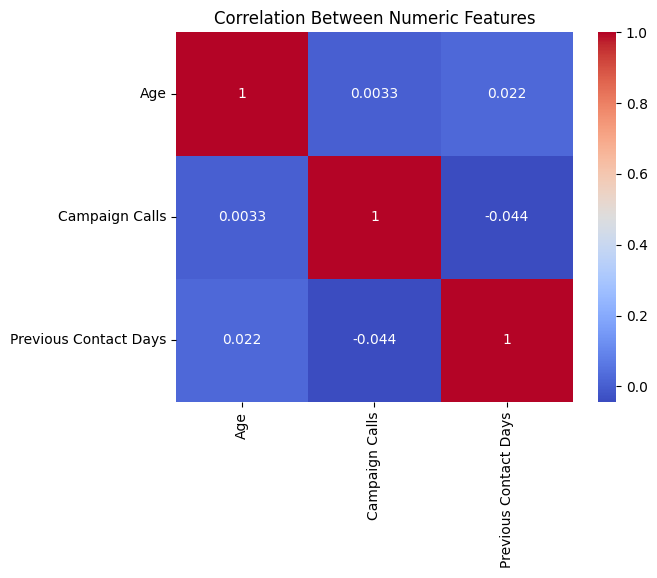

In [ ]:
numeric_cols = ['Age', 'Campaign Calls', 'Previous Contact Days']

corr_matrix = df_new[numeric_cols].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

> **Observation:**
___

- Overall, the numeric columns have are very low correlation.

- Age compared to Campaign Calls and Previous Contact Days have a slight positive correlation, with 0.0033 and 0.022 repsectively.

- Campaign Calls and Previous Contact Days have a slight negative correlation with -0.044

> **THOUGHT PROCESS:**
___

1. This shows that the numeric columns have non-linear relationship between them.

2. The columns are mostly independent of one another.

### Correlation Heatmap (MI)

In [ ]:
def mutual_information_matrix(df):
  columns = df.columns
  n = len(columns)
  mi_matrix = pd.DataFrame(np.zeros((n, n)), columns=columns, index=columns)

  discrete_mask = []
  for col in columns:
      if df[col].dtype == 'bool':
          discrete_mask.append(True)
      elif df[col].dtype == 'object':
          discrete_mask.append(True)
      elif df[col].dtype == 'int64':
          discrete_mask.append(False)
      else:
          discrete_mask.append(False)
  discrete_mask = np.array(discrete_mask)

  # Compute MI for each pair
  for i in range(n):
      for j in range(i, n):

          x = df[columns[i]].values.reshape(-1, 1)
          y = df[columns[j]]

          # pick the correct MI function based on y (target)
          if discrete_mask[j]:
              mi = mutual_info_classif(x, y, random_state=42, discrete_features=[discrete_mask[i]])[0]
          else:
              mi = mutual_info_regression(x, y, random_state=42, discrete_features=[discrete_mask[i]])[0]

          mi_matrix.iloc[i, j] = mi
          mi_matrix.iloc[j, i] = mi

  plt.figure(figsize=(12, 10))
  sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap="viridis", square=True)
  plt.title("Mutual Information Heatmap")
  plt.show()

  return mi_matrix

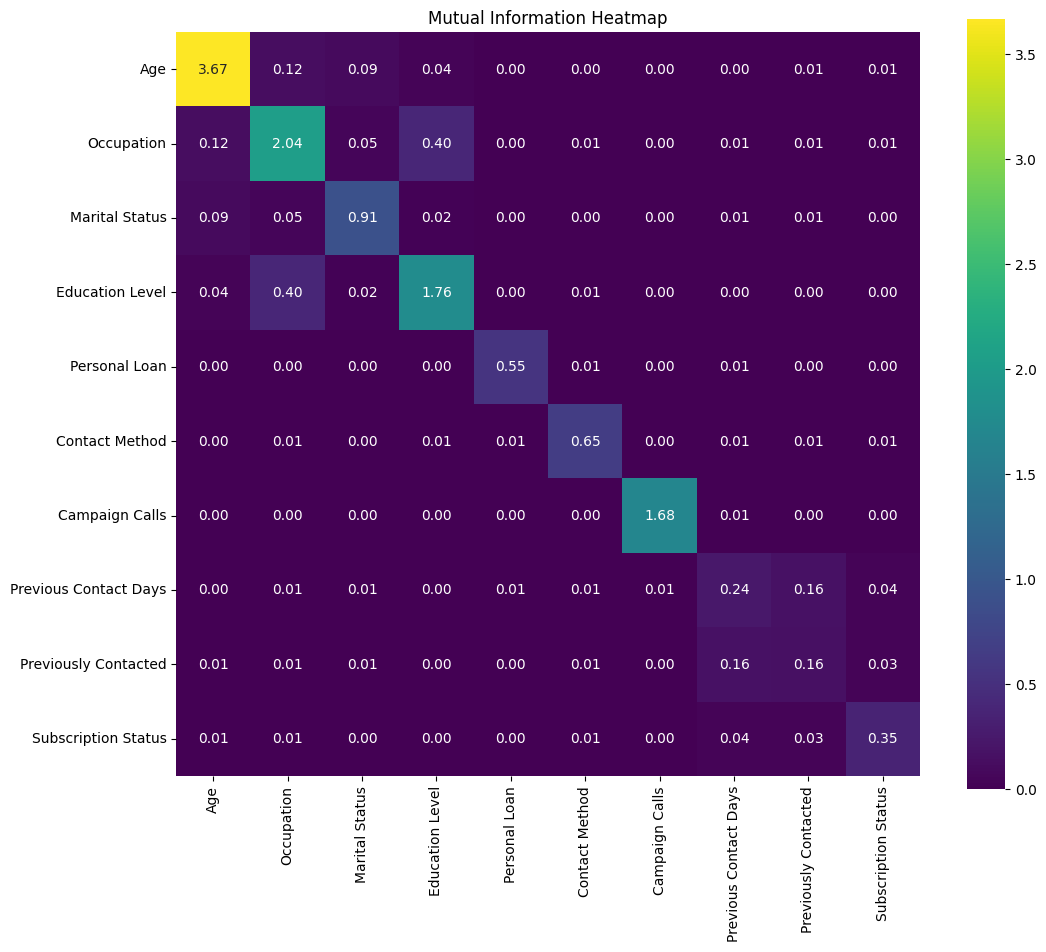

                            Age  Occupation  Marital Status  Education Level  \
Age                    3.668672    0.120255        0.092407         0.042943   
Occupation             0.120255    2.037151        0.046106         0.400781   
Marital Status         0.092407    0.046106        0.911710         0.024446   
Education Level        0.042943    0.400781        0.024446         1.763950   
Personal Loan          0.000000    0.000000        0.004819         0.000000   
Contact Method         0.002554    0.009957        0.004765         0.008545   
Campaign Calls         0.000000    0.000000        0.000000         0.000000   
Previous Contact Days  0.000000    0.007363        0.006366         0.000000   
Previously Contacted   0.007332    0.008441        0.005036         0.003486   
Subscription Status    0.011584    0.010510        0.003143         0.004515   

                       Personal Loan  Contact Method  Campaign Calls  \
Age                         0.000000        0.0

In [ ]:
encode_df = encoder_fn(df_new)
mi_matrix = mutual_information_matrix(encode_df)
print(mi_matrix)

> **Observation:**
___

- The mutual information between the columns

> **THOUGHT PROCESS:**
___

1. Overall, the columns are mostly independent of one another.

### Chi Square Test

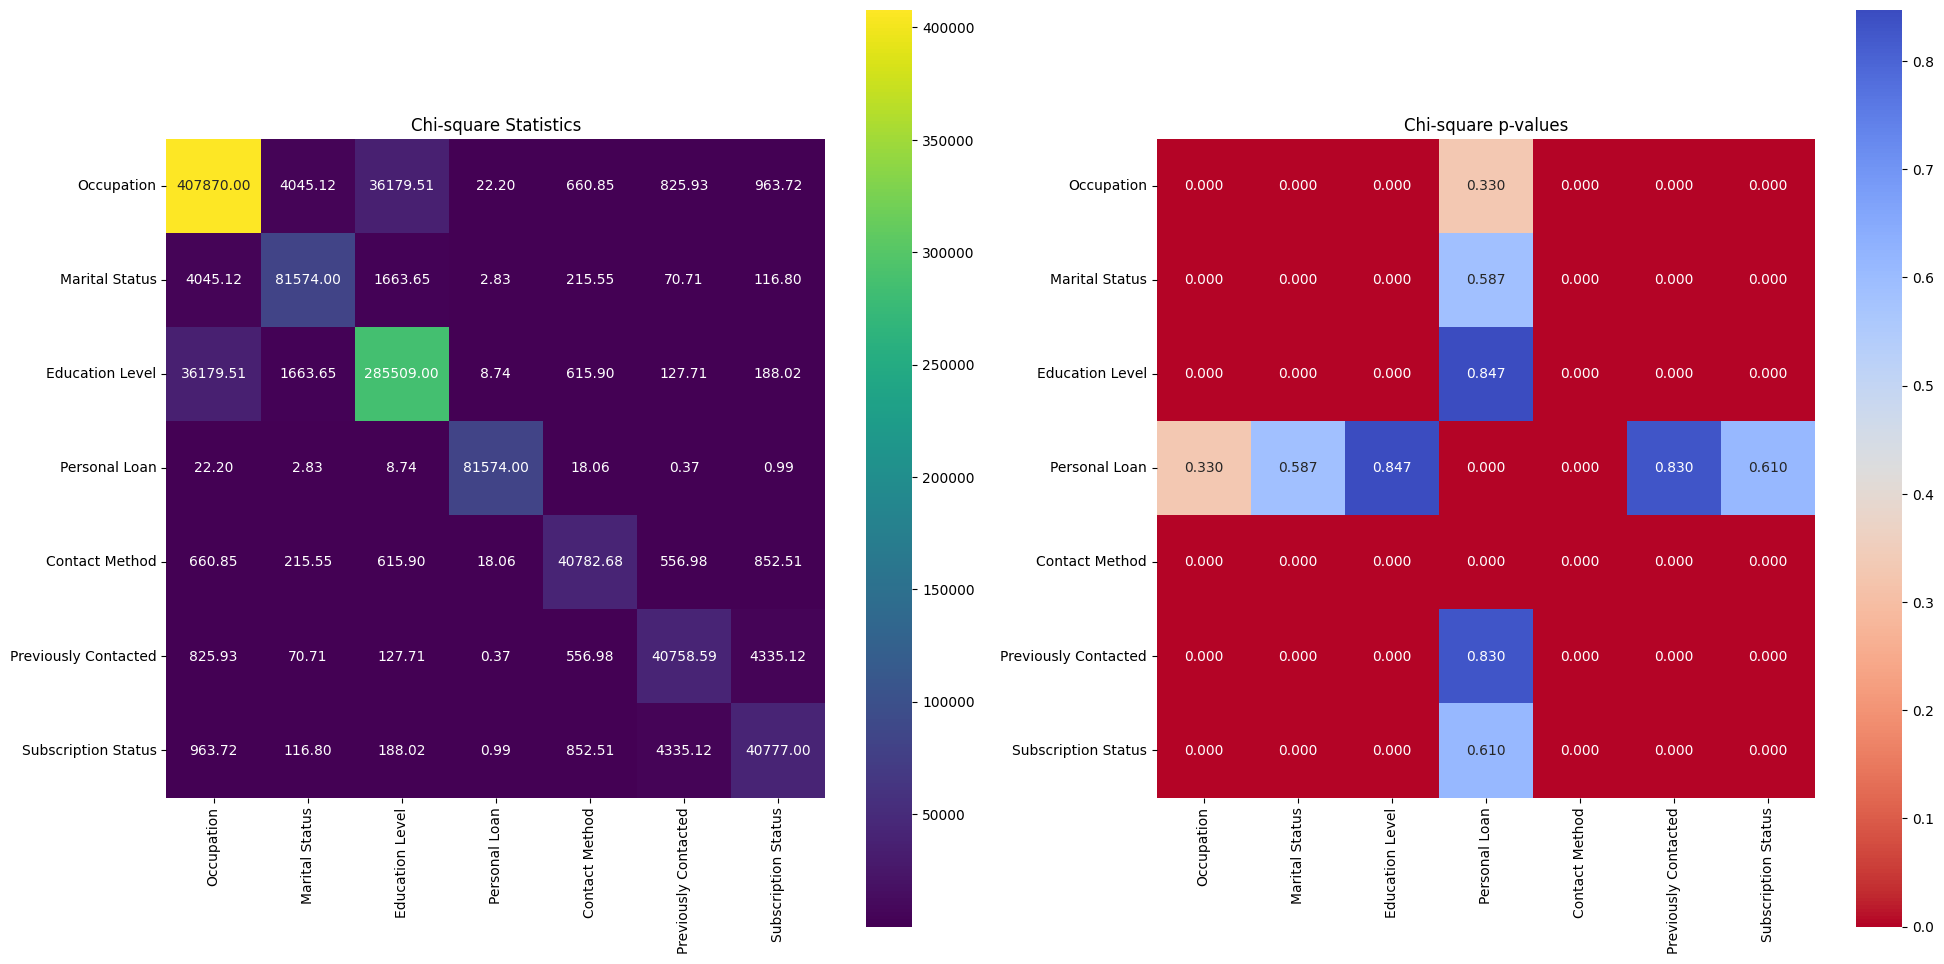

(                         Occupation  Marital Status  Education Level  \
 Occupation            407870.000000     4045.117713     36179.505595   
 Marital Status          4045.117713    81574.000000      1663.647637   
 Education Level        36179.505595     1663.647637    285509.000000   
 Personal Loan             22.203203        2.830769         8.738664   
 Contact Method           660.851162      215.549365       615.903137   
 Previously Contacted     825.933649       70.714195       127.710883   
 Subscription Status      963.723715      116.802253       188.017680   
 
                       Personal Loan  Contact Method  Previously Contacted  \
 Occupation                22.203203      660.851162            825.933649   
 Marital Status             2.830769      215.549365             70.714195   
 Education Level            8.738664      615.903137            127.710883   
 Personal Loan          81574.000000       18.061788              0.371926   
 Contact Method         

In [ ]:
from scipy.stats import chi2_contingency
def chi2_matrix(df):
  cat_cols = df.select_dtypes(include=['object', 'bool']).columns
  n = len(cat_cols)

  chi2_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)
  p_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)

  for i in range(n):
      for j in range(i, n):
          # contingency table
          table = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
          chi2, p, dof, expected = chi2_contingency(table)

          chi2_matrix.iloc[i, j] = chi2
          chi2_matrix.iloc[j, i] = chi2
          p_matrix.iloc[i, j] = p
          p_matrix.iloc[j, i] = p

  fig, axes = plt.subplots(1, 2, figsize=(20, 10))
  sns.heatmap(chi2_matrix, annot=True, fmt=".2f", cmap="viridis", square=True, ax=axes[0])
  axes[0].set_title("Chi-square Statistics")

  sns.heatmap(p_matrix, annot=True, fmt=".3f", cmap="coolwarm_r", square=True, ax=axes[1])
  axes[1].set_title("Chi-square p-values")

  plt.tight_layout()
  plt.show()

  return chi2_matrix, p_matrix

chi2_matrix(df_new)

### Potential feature selection method

In [ ]:
def my_train_test_split(df: pd.DataFrame, val_sample: bool=False, test_size: int=0.2, rs: int=42) -> Union[Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series],
                                                                                                        Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series]]:
  """
  Split input DataFrame into train, test and val(optional)

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame

  val_sample: bool
    State whether to generate validation data sample

  test_size: int
    State the size of test dataset

  rs: int
    Set random state for randomness
  """
  label = "Subscription Status"
  X, y = df.drop(label, axis=1), df[label]
  if val_sample:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=rs, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rs, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rs, stratify=y)
    return X_train, X_test, y_train, y_test

##### Mutual Information with Subscription Status

In [ ]:
X_train, X_test, y_train, y_test = my_train_test_split(df_new, test_size=0.3)
int_encoded_X = encoder_fn(X_train)
int_encoded_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28550 entries, 38914 to 39273
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    28550 non-null  int64
 1   Occupation             28550 non-null  int64
 2   Marital Status         28550 non-null  int64
 3   Education Level        28550 non-null  int64
 4   Personal Loan          28550 non-null  int64
 5   Contact Method         28550 non-null  int64
 6   Campaign Calls         28550 non-null  int64
 7   Previous Contact Days  28550 non-null  int64
 8   Previously Contacted   28550 non-null  bool 
dtypes: bool(1), int64(8)
memory usage: 2.0 MB


In [ ]:
discrete_mask=[False, True, True, True, True, True, False, False, True]

mi_scores4 = mutual_info_classif(int_encoded_X, y_train, random_state=42, discrete_features=discrete_mask)

In [ ]:
mi4 = pd.Series(mi_scores4)
mi4.index = int_encoded_X.columns
mi4 = mi4.rename(y_train.name).sort_values(ascending=False).round(4).reset_index()
mi4

,index,Subscription Status
0,Previous Contact Days,0.0353
1,Previously Contacted,0.0318
2,Age,0.0111
3,Contact Method,0.0109
4,Occupation,0.0093
5,Education Level,0.0023
6,Campaign Calls,0.0013
7,Marital Status,0.0010
8,Personal Loan,0.0000


In [ ]:
plot_bar_graph(mi4, col='index', y='Subscription Status', kind='bar', title="Mutual Information with Subscription Status", x_rotation=45)

In [ ]:
select_cols = SelectKBest(k=5)
select_cols.scores_ = mi_scores4
select_cols.pvalues_ = None
select_cols.fit(int_encoded_X, y_train)
int_encoded_X.columns[select_cols.get_support()]

Index(['Education Level', 'Contact Method', 'Campaign Calls',
       'Previous Contact Days', 'Previously Contacted'],
      dtype='object')

In [ ]:
select_cols = SelectPercentile(percentile=70)
select_cols.scores_ = mi_scores4
select_cols.pvalues_ = None
select_cols.fit(int_encoded_X, y_train)
int_encoded_X.columns[select_cols.get_support()]

Index(['Marital Status', 'Education Level', 'Contact Method', 'Campaign Calls',
       'Previous Contact Days', 'Previously Contacted'],
      dtype='object')

With a clean dataset, I can proceed with a pre-feature selection using the mutual information

> **Observation:**
___

- Looking

> **THOUGHT PROCESS:**
___

1.

##### Mutual Information with Subscription Status (One Hot Encoded)

In [ ]:
ohe_encoded_X = ohe_encode(X_train)
ohe_encoded_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28550 entries, 38914 to 39273
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28550 non-null  int64  
 1   Occupation_admin.                    28550 non-null  float64
 2   Occupation_blue-collar               28550 non-null  float64
 3   Occupation_entrepreneur              28550 non-null  float64
 4   Occupation_housemaid                 28550 non-null  float64
 5   Occupation_management                28550 non-null  float64
 6   Occupation_retired                   28550 non-null  float64
 7   Occupation_self-employed             28550 non-null  float64
 8   Occupation_services                  28550 non-null  float64
 9   Occupation_student                   28550 non-null  float64
 10  Occupation_technician                28550 non-null  float64
 11  Occupation_unemployed        

In [ ]:
mi_scores5 = mutual_info_classif(ohe_encoded_X, y_train, random_state=42, discrete_features="auto")

In [ ]:
mi5 = pd.Series(mi_scores5)
mi5.index = ohe_encoded_X.columns
mi5 = mi5.rename(y_train.name).sort_values(ascending=False).round(4).reset_index()
mi5

,index,Subscription Status
0,Previous Contact Days,0.0374
1,Previously Contacted,0.0312
2,Contact Method_telephone,0.0123
3,Contact Method_cellular,0.0116
4,Age,0.0076
5,Campaign Calls,0.0056
6,Occupation_retired,0.0047
7,Personal Loan_no,0.0044
8,Marital Status_married,0.0044
9,Marital Status_divorced,0.0043


In [ ]:
plot_bar_graph(mi5, top=15, col='index', y='Subscription Status', kind='bar', title="Mutual Information with Subscription Status", x_rotation=45)

In [ ]:
select_cols = SelectKBest(k=15)
select_cols.scores_ = mi_scores5
select_cols.pvalues_ = None
select_cols.fit(ohe_encoded_X, y_train)
ohe_encoded_X.columns[select_cols.get_support()]

Index(['Age', 'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_retired', 'Occupation_services', 'Occupation_student',
       'Marital Status_married', 'Marital Status_single',
       'Education Level_basic.9y', 'Education Level_university.degree',
       'Contact Method_cellular', 'Contact Method_telephone', 'Campaign Calls',
       'Previous Contact Days', 'Previously Contacted'],
      dtype='object')

In [ ]:
select_cols = SelectPercentile(percentile=70)
select_cols.scores_ = mi_scores5
select_cols.pvalues_ = None
select_cols.fit(ohe_encoded_X, y_train)
ohe_encoded_X.columns[select_cols.get_support()]

Index(['Age', 'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_retired', 'Occupation_services',
       'Occupation_student', 'Occupation_unemployed',
       'Marital Status_divorced', 'Marital Status_married',
       'Marital Status_single', 'Education Level_basic.6y',
       'Education Level_basic.9y', 'Education Level_illiterate',
       'Education Level_university.degree', 'Education Level_unknown',
       'Contact Method_cellular', 'Contact Method_telephone', 'Campaign Calls',
       'Previous Contact Days', 'Previously Contacted'],
      dtype='object')

> **Observation:**
___

-

> **THOUGHT PROCESS:**
___

1.

## Save Dataframe

In [ ]:
df_new.to_csv('data/df_bmarket.csv')

## Pipeline function preparation

#### Clean data

In [ ]:
def random_distribution(df: pd.DataFrame, target_col: str, target_val: Any ="none") -> pd.DataFrame:
  """
  Apply random distribution imputation to selected column

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame

  target_col: str
    Selected column to impute

  target_val: Any
    Selected value (data) to be impute
    input: "none" (default) or specific value from column
    example:
      "none"    : imputes all the np.nan or None in specified column
      150       : imputes all values with 150 in the specified column
      "unknown" : imputes all values with unknown in the specified column
  """
  df_temp = df.copy()
  col = df_temp[target_col]
  if target_val == "none":
    temp_col = col[~col.isna()]
    tobe_fill = col.isna()
  else:
    temp_col = col[col!=target_val]
    tobe_fill = (col==target_val)
  distribution = temp_col.value_counts(normalize=True).tolist()
  labels = temp_col.value_counts().index.tolist()
  fill_mask = tobe_fill
  fill = np.random.choice(labels, size=fill_mask.sum(), p=distribution)
  df_temp.loc[fill_mask, target_col] = fill
  return df_temp

def reindex_target_col(df: pd.DataFrame) -> pd.DataFrame:
  """
  Move position of Subscription Status column (target/label) to the back

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  cols = df.columns.tolist()
  cols.remove("Subscription Status")
  cols.append("Subscription Status")
  df_reorganized = df.reindex(columns=cols)
  return df_reorganized

def clean_clientId(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Client ID column
  Function action: Drop Client Id column

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.drop("Client ID", axis=1)
  return df_new

def clean_age(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Age column
  Function actions: Remove 'years' and keep the age number as integer,
  then apply random distribution imputation to Age column.

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_temp = df.copy()
  df_temp["Age"] = df_temp["Age"].map(lambda x: x.split()[0])
  df_temp["Age"] = df_temp["Age"].astype(int)
  df_new = random_distribution(df_temp, target_col="Age", target_val=150)
  return df_new

def clean_occupation(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Occupation column
  Function action: Drop rows with 'unknown'

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.drop(df[df["Occupation"] == "unknown"].index, axis=0)
  return df_new

def clean_maritalStatus(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Marital Status column
  Function action: drop rows with 'unknown'

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.drop(df[df["Marital Status"] == "unknown"].index, axis=0)
  return df_new

def clean_creditDefault(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Credit Default column
  Function action: 'Drop Credit Default Column

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.drop("Credit Default", axis=1)
  return df_new

def clean_housingLoan(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Housing Loan column
  Function action: Drop Housing Loan Column

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.drop("Housing Loan", axis=1)
  return df_new

def clean_personalLoan(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Personal Loan column
  Function action: Apply random distribution imputation to Personal Loan column

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_temp = df.copy()
  df_new = random_distribution(df_temp, target="Personal Loan")
  return df_new

def clean_contactMethod(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Contact Method column
  Function action: Rename 'Cell' value with 'cellular' and 'Telephone' with 'telephone'

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.copy()
  df_new["Contact Method"].replace(["Cell", "Telephone"], ["cellular", "telephone"], inplace=True)
  return df_new

def clean_campaignCalls(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Campaign Calls column
  Function action: Absolute/Convert all negative values to positive

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.copy()
  df_new["Campaign Calls"] = df_new["Campaign Calls"].apply(lambda x: abs(x))
  return df_new

def clean_previousContactDays(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Previous Contact Days column
  Function action: Rename 999 to -1 and added a Previously Contacted column
                   as boolean:
                   False = no prior contact
                   True = got prior contact

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.copy()
  df_new["Previously Contacted"] = df_new["Previous Contact Days"] != 999
  df_new.replace({"Previous Contact Days": 999}, -1, inplace=True)
  df_new = reindex_target_col(df_new)
  return df_new

def clean_subscriptionStatus(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Subscription Status column
  Function action: Rename 'yes' with 1 and 'no' with 0 and convert to boolean type

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_new = df.copy()
  df_new["Subscription Status"].replace({"yes": 1, "no": 0}, inplace=True)
  df_new["Subscription Status"] = df_new["Subscription Status"].astype(bool)
  return df_new

#### Encode data

In [ ]:
def encoder_selection(encoder: str="ohe") -> Union[OneHotEncoder, LabelEncoder]:
  """
  Select One Hot Encoding or Integer Encoding method

  parameters:
  -----------
  encoder: "ohe" (default) or "int"
    ohe: one hot encoding
    int: integer encoding
  """
  match encoder:
    case "ohe":
      encoder = OneHotEncoder()
    case "int":
      encoder = LabelEncoder()
    case _:
      raise ValueError("encoder must be 'ohe' or 'int'")
  return encoder

def ohe_encode(df: pd.DataFrame) -> pd.DataFrame:
  """
  One hot encode all object type columns in input DataFrame

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  encoder = encoder_selection("ohe")
  df_copy = df.copy()
  df_encode = pd.DataFrame(index=df_copy.index)

  for col in df_copy.columns:
    if df_copy[col].dtype == "object":
      encoded = encoder.fit_transform(df_copy[[col]])
      value_col = encoder.get_feature_names_out([col])
      encoded_df = pd.DataFrame(encoded, columns=value_col, index=df_copy.index)
      df_encode = pd.concat([df_encode, encoded_df], axis=1)
    else:
      df_encode[col] = df_copy[col]
  return df_encode

def int_encode(df: pd.DataFrame) -> pd.DataFrame:
  """
  Integer encode all object type columns in input DataFrame

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  encoder = encoder_selection("int")
  df_copy = df.copy()
  df_encode = pd.DataFrame(index=df_copy.index)

  for col in df_copy.columns:
      if df_copy[col].dtype == "object":
          df_encode[col] = encoder.fit_transform(df_copy[col])
      else:
          df_encode[col] = df_copy[col]
  return df_encode

#### Split Data

In [ ]:
def my_train_test_split(df: pd.DataFrame, val_sample: bool=False, test_size: int=0.2, rs: int=42) -> Union[Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series],
                                                                                                        Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series]]:
  """
  Split input DataFrame into train, test and val(optional)

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame

  val_sample: bool
    State whether to generate validation data sample

  test_size: int
    State the size of test dataset

  rs: int
    Set random state for randomness
  """
  label = "Subscription Status"
  X, y = df.drop(label, axis=1), df[label]
  if val_sample:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=rs, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rs, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rs, stratify=y)
    return X_train, X_test, y_train, y_test

#### Variation of data preparation

In [ ]:
# Use SMOTE to balance training dataset
def smote(X_train: pd.DataFrame, y_train: pd.Series, rs: int=42) -> Tuple[pd.DataFrame, pd.Series]:
  """
  Apply SMOTE to training dataset

  paramters:
  ----------
  X_train: pd.DataFrame
    Input features training dataset

  y_train: pd.Series
    Input label training dataset

  rs: int
    Set random state for randomness
  """
  smote = SMOTE(random_state=rs)
  X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
  X_train_res, y_train_res = pd.DataFrame(X_train_res), pd.Series(y_train_res)
  return X_train_res, y_train_res

# Utilize KNNImputer for Age column (impute value 150)
def my_knnimputer(df: pd.DataFrame, target_col: str, target_val: Any=None, corr_cols: list=None, n_neighbors: int=5):
  """
  Impute target values such as missing data with KNN
  Ensure all columns in corr_cols are encoded or numeric

  paramters:
  ----------
  df: pd.DataFrame
    Input DataFrame

  target_col: str
    Column to be impute

  target_val: Any
    Value in target column to be impute

  corr_cols: list
    Correlated columns to assist in KNN imputation

  n_neighbors: int
    Set the number of similar groups (nearest neighbours) to look
    at when estimating a missing value.
  """
  df_copy = df.copy()
  imputer = KNNImputer(n_neighbors=n_neighbors)

  if target_val is not None:
    df_copy[target_col] = df_copy[target_col].replace({target_val: np.nan})

  if corr_cols is not None:
    final_corr_cols = corr_cols if target_col in corr_cols else corr_cols.append(target_col)
    df_copy[final_corr_cols] = imputer.fit_transform(df_copy[final_corr_cols])
  else:
    df_copy[target_col] = imputer.fit_transform(df_copy[[target_col]])

  return df_copy

# Vairant of clean age function (with knn)
def clean_age_with_knn(df: pd.DataFrame) -> pd.DataFrame:
  """
  Data cleaning on Age column
  Function actions: Remove 'years' and keep the age number as integer,
  then apply KNN imputation to Age column.

  ! Correlated features selected to assist with imputation are (based on EDA Mutual Information):
    ['Occupation', 'Marital Status', 'Education Level',
    'Subscription Status','Previous Contact Days']

  !! Ensure cleaning for other columns are done, excluding the clean_age function,
  before using this function

  !!! This function auto encode the cleaned data with int_encode before imputing

  parameters:
  -----------
  df: pd.DataFrame
    Input DataFrame
  """
  df_temp = df.copy()
  df_temp["Age"] = df_temp["Age"].map(lambda x: x.split()[0])
  df_temp["Age"] = df_temp["Age"].astype(int)

  corr_cols = ['Occupation', 'Marital Status', 'Education Level',
              'Subscription Status','Previous Contact Days']

  encoded_df = int_encode(df_temp[corr_cols].append("Age"))
  df_new["Age"] = my_knnimputer(encoded_df, target_col="Age", target_val=150, corr_cols=corr_cols)
  return df_new


## Conclusion